In [1]:
%load_ext autoreload
%autoreload 2
from get import *

{0: '00_toy_dataset', 1: '01_mnist_cc', 2: '02_mnist_constant_image', 3: '03_mnist_constant_image_random_row', 4: '04_mnist_uniform_color_random_row', 5: '05_mnist_uniform_color_low_mix_rate', 6: '06_mnist_sum', 7: '07_mnist_sum_bis', 8: '08_mnist_sum_noise_level', 12: '12_mnist_mysterious', 13: '13_mnist_mysterious', 23: '23_mnist_embed', 456: '456_mnist_embed', 999: '999_humans'}


/home/t-boulet/projects/hackathon42/Hackaton42/timothe/venvHACK42/lib/python3.7/site-packages/torch/cuda/__init__.py:98: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Labeled ds shape:  torch.Size([500, 2])
Unlabeled ds shape:  torch.Size([500, 2])
Validation ds shape:  torch.Size([500, 2])
Labels shape:  torch.Size([500])
Labeled ds labels:  [0. 1.]



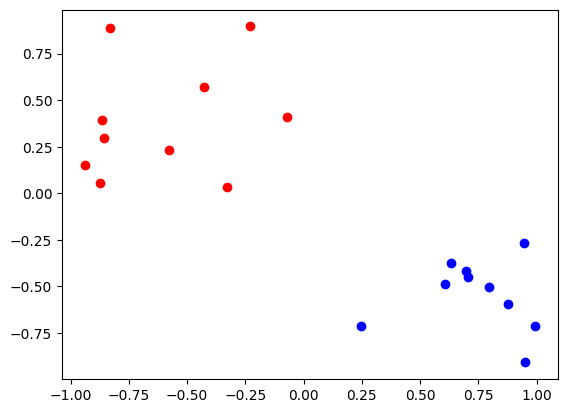

tensor([-0.2127,  0.0375])
tensor([-0.0531, -0.8977])
tensor([ 0.7091, -0.5343])
tensor([-0.3200, -0.0160])
tensor([ 0.7393, -0.3795])
tensor([-0.8237, -0.6365])
tensor([0.5536, 0.0083])
tensor([ 0.6951, -0.3544])
tensor([-0.6364, -0.4838])
tensor([-0.1393, -0.0720])
tensor([-0.6690, -0.7334])
tensor([0.4132, 0.8555])
tensor([0.0707, 0.7354])
tensor([0.2706, 0.4152])
tensor([-0.6070, -0.7876])
tensor([-0.5765,  0.5518])
tensor([-0.9170,  0.6159])
tensor([-0.3559,  0.5355])
tensor([ 0.1195, -0.7721])
tensor([0.7159, 0.2878])


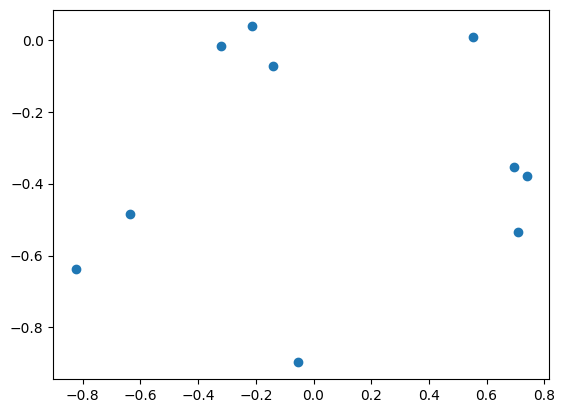

In [2]:
# Load dataset 0
X_labeled, y_labeled, X_unlabeled, X_val = load_datasets(n_dataset = 0)

display_dataset(n_dataset = 0)

In [3]:
# Window function
def window_function0(X):
    """From a dataset, return the uncorellated modified dataset"""
    return X[:, :]     # only takes first component

# Get uncorrelated data
uX_labeled = window_function0(X_labeled)
uX_unlabeled = window_function0(X_unlabeled)
uX_val = window_function0(X_val)

In [4]:
# Torch regression model
import torch
from torch.autograd import Variable

inputDim = 2        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 10000

class LogisticRegression(torch.nn.Module):
     def __init__(self, input_dim, output_dim):
         super(LogisticRegression, self).__init__()
         self.linear = torch.nn.Linear(input_dim, output_dim)
     def forward(self, x):
         outputs = torch.sigmoid(self.linear(x))
         return outputs



model = LogisticRegression(inputDim, outputDim)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)


In [5]:

losses = []
losses_test = []
Iterations = []
iter = 0

X_train, X_test, y_train, y_test = train_test_split(uX_labeled, y_labeled)

print("X SHAPE:", X_train.shape)

for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) 
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. the weights/bias
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    
    if iter%1000==0:
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")
    iter+=1

X SHAPE: torch.Size([375, 2])


Training Epochs:   0%|          | 0/10000 [00:00<?, ?it/s]

Iteration: 0. 
Test - Loss: 0.3776703476905823. Accuracy: 8.8
Train -  Loss: 0.3985072076320648. Accuracy: 4.0

Iteration: 1000. 
Test - Loss: 0.13251309096813202. Accuracy: 99.2
Train -  Loss: 0.12318660318851471. Accuracy: 99.2

Iteration: 2000. 
Test - Loss: 0.07938702404499054. Accuracy: 100.0
Train -  Loss: 0.06846734136343002. Accuracy: 99.2

Iteration: 3000. 
Test - Loss: 0.060217518359422684. Accuracy: 100.0
Train -  Loss: 0.04942842945456505. Accuracy: 99.46666666666667

Iteration: 4000. 
Test - Loss: 0.0502769760787487. Accuracy: 100.0
Train -  Loss: 0.03978758677840233. Accuracy: 99.46666666666667

Iteration: 5000. 
Test - Loss: 0.0440828874707222. Accuracy: 100.0
Train -  Loss: 0.033907245844602585. Accuracy: 99.46666666666667

Iteration: 6000. 
Test - Loss: 0.03978751227259636. Accuracy: 100.0
Train -  Loss: 0.02990921214222908. Accuracy: 99.73333333333333

Iteration: 7000. 
Test - Loss: 0.036595746874809265. Accuracy: 100.0
Train -  Loss: 0.02699223905801773. Accuracy: 99

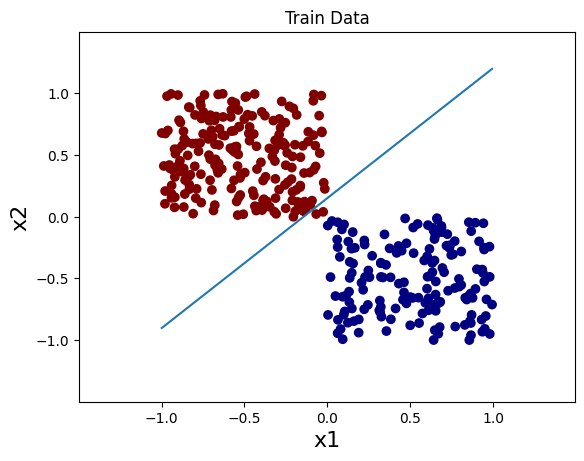

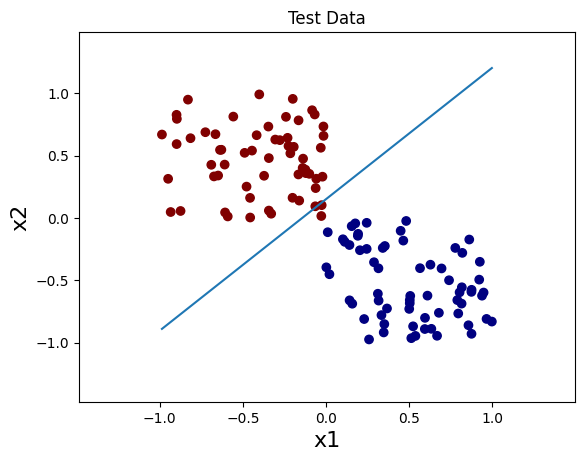

In [6]:
def model_plot(model,X,y,title):
    parm = {}
    b = []
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()  
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    plt.plot(u, (0.5-b-w[0]*u)/w[1])
    plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
    plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)
    plt.xlabel('x1',fontsize=16) # Normally you can just add the argument fontweight='bold' but it does not work with latex
    plt.ylabel('x2',fontsize=16)
    plt.title(title)
    plt.show()


# Train Data
model_plot(model,X_train,y_train,'Train Data')

# Test Dataset Results
model_plot(model,X_test,y_test,'Test Data')


In [7]:
import pandas as pd
with torch.no_grad():
    y_pred = model(uX_val)


print(y_pred.shape)
print(y_pred)
pred = torch.argmax(y_pred, dim=1)

pred = pred.numpy()
df = pd.DataFrame(pred)
df.to_csv("example_submission.csv", header=False, index=False)

torch.Size([500, 1])
tensor([[0.1232],
        [0.4511],
        [0.1430],
        [0.0643],
        [0.4750],
        [0.3352],
        [0.7892],
        [0.9847],
        [0.7640],
        [0.9009],
        [0.0319],
        [0.4769],
        [0.3566],
        [0.8218],
        [0.6010],
        [0.0887],
        [0.9721],
        [0.7260],
        [0.8961],
        [0.6365],
        [0.3269],
        [0.0513],
        [0.4415],
        [0.6587],
        [0.5352],
        [0.9740],
        [0.0200],
        [0.9713],
        [0.1749],
        [0.9756],
        [0.4503],
        [0.9381],
        [0.6713],
        [0.3046],
        [0.0757],
        [0.5706],
        [0.4726],
        [0.5308],
        [0.8569],
        [0.2410],
        [0.1476],
        [0.9674],
        [0.9354],
        [0.6759],
        [0.2985],
        [0.0457],
        [0.9132],
        [0.5331],
        [0.0457],
        [0.0951],
        [0.3348],
        [0.1243],
        [0.5921],
        [0.1661],
       